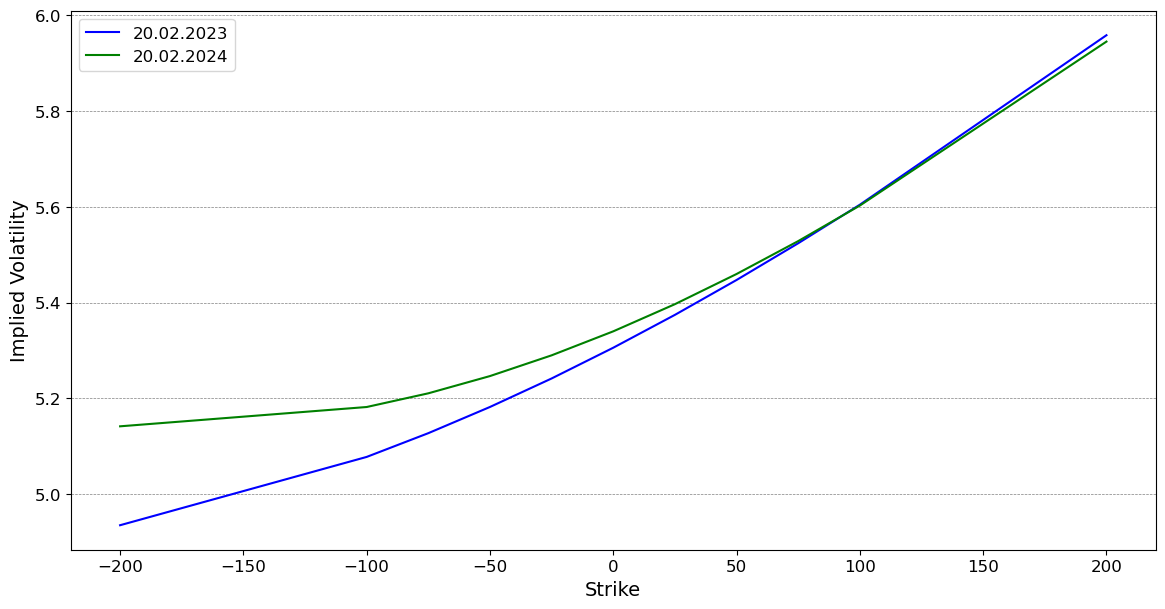

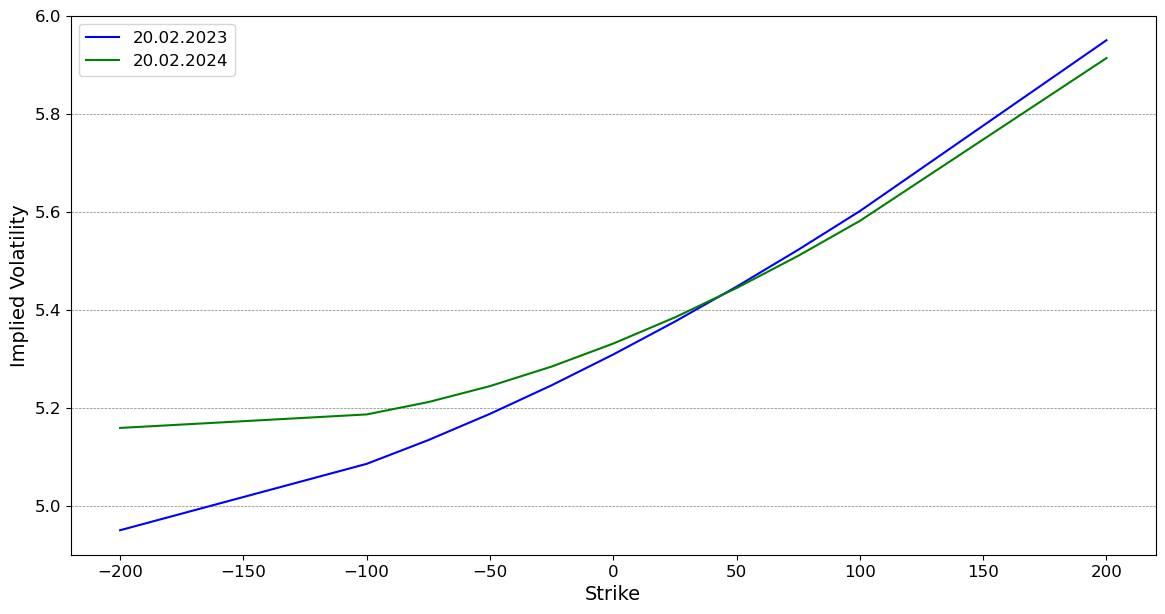

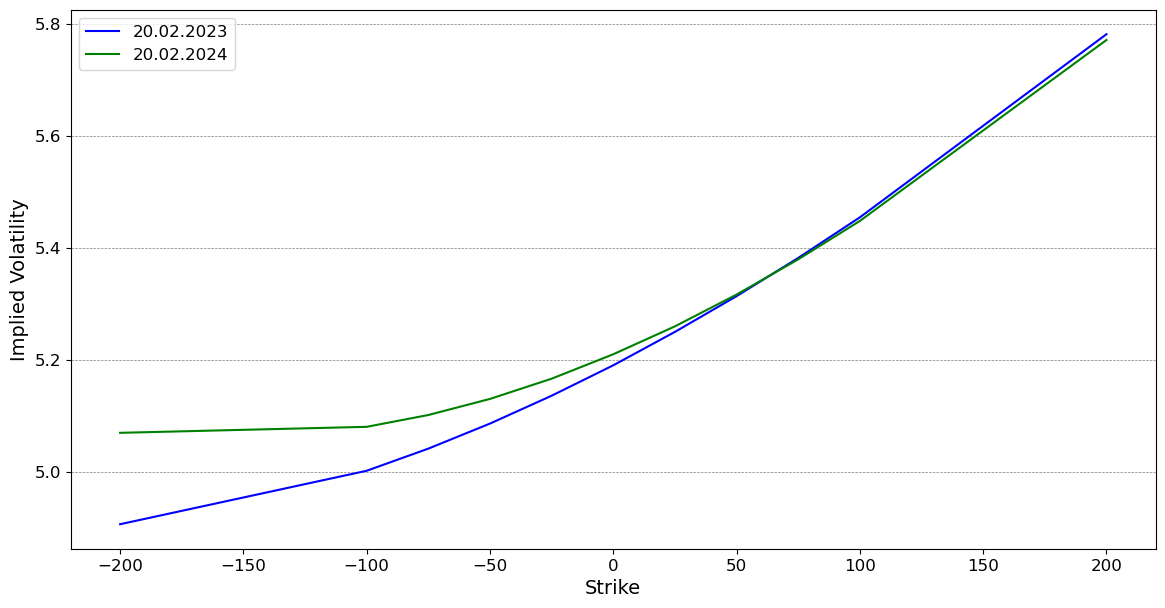

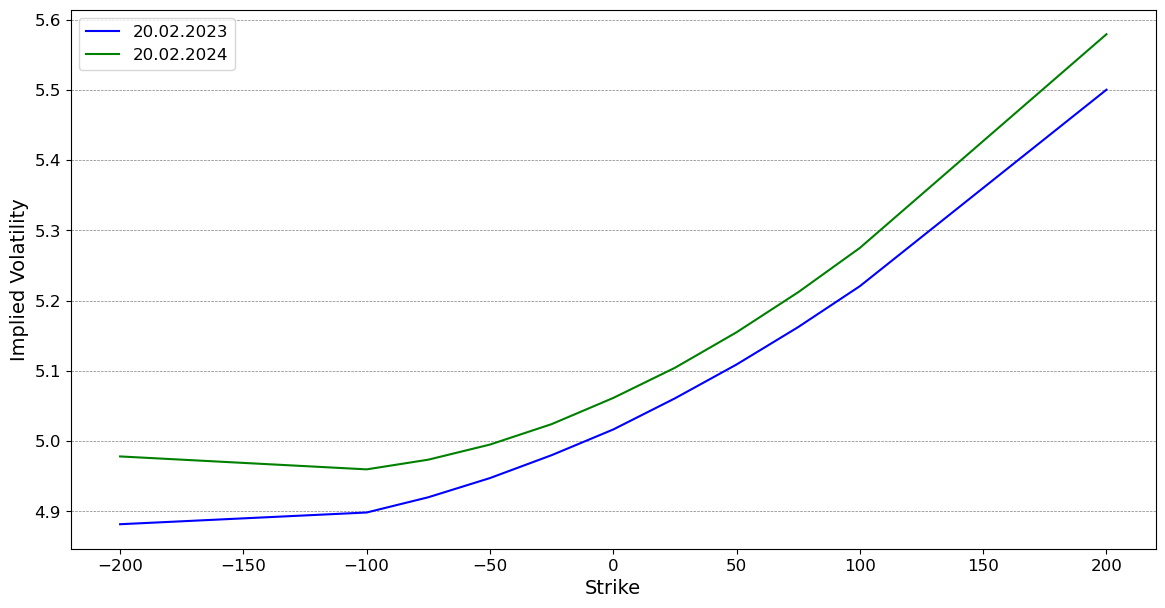

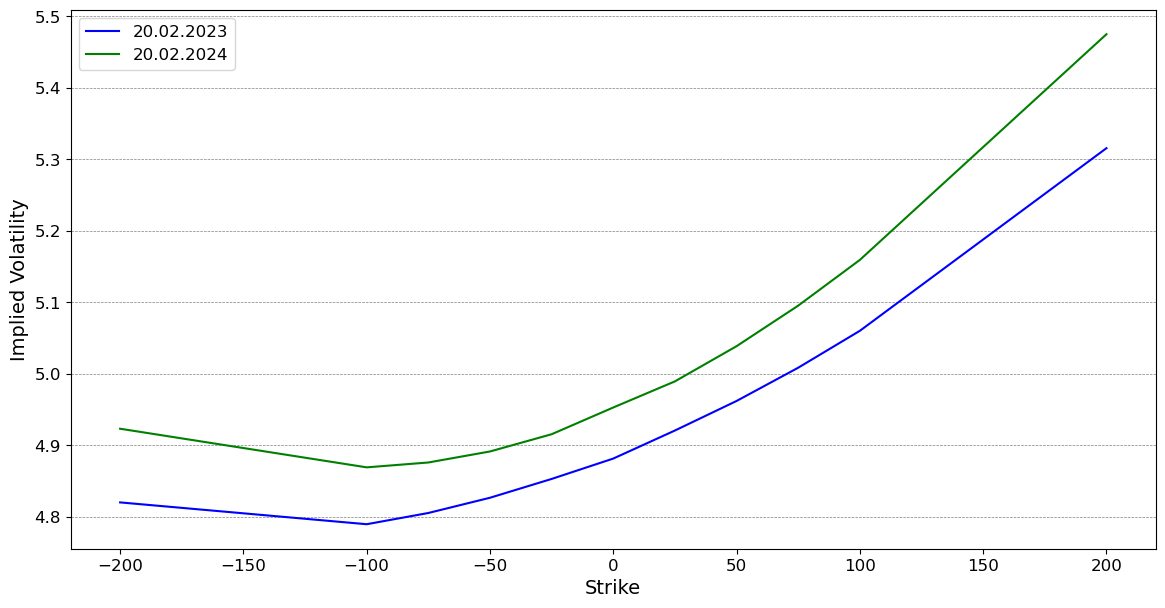

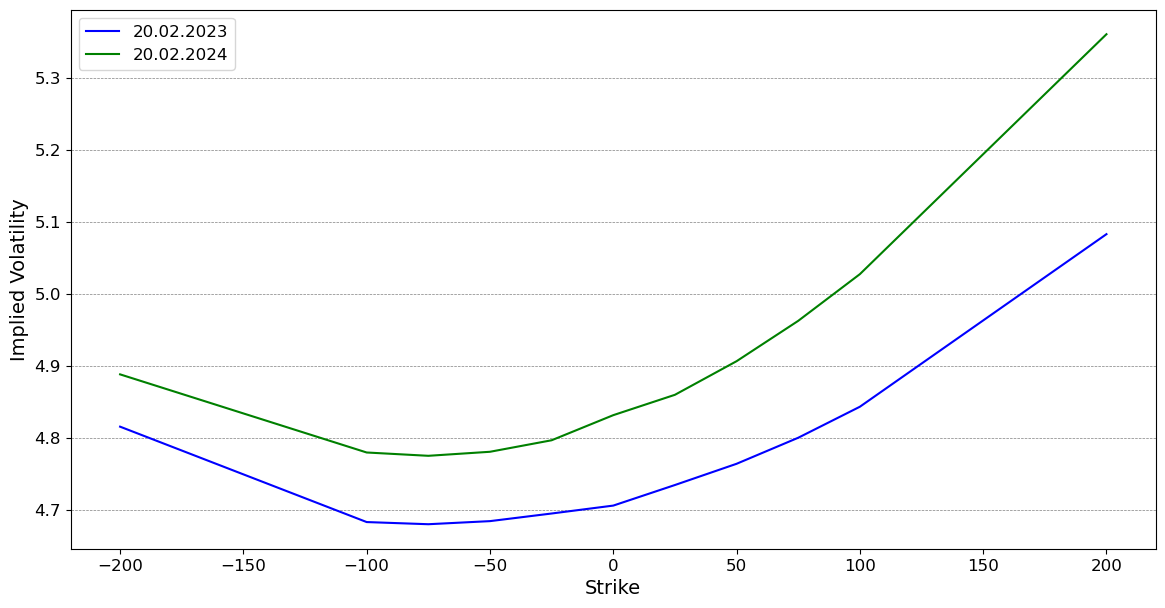

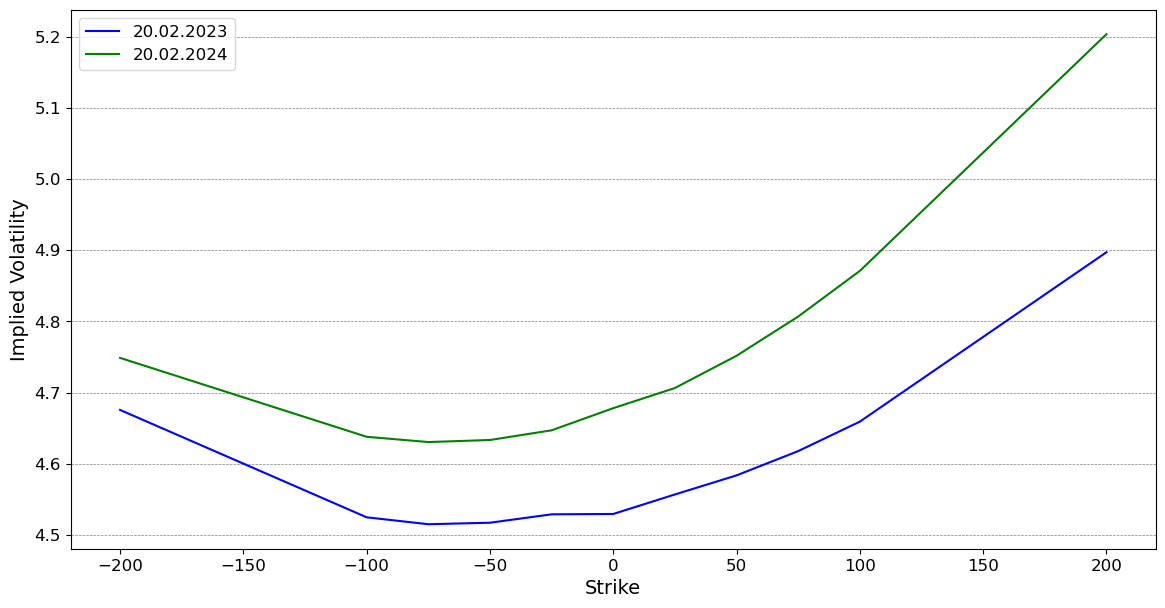

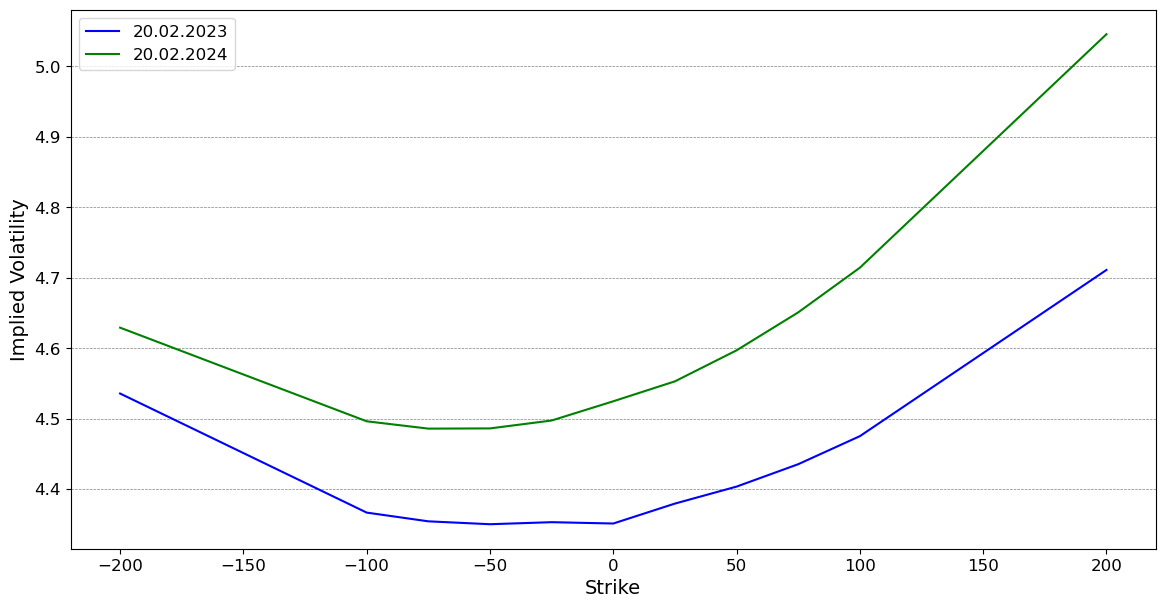

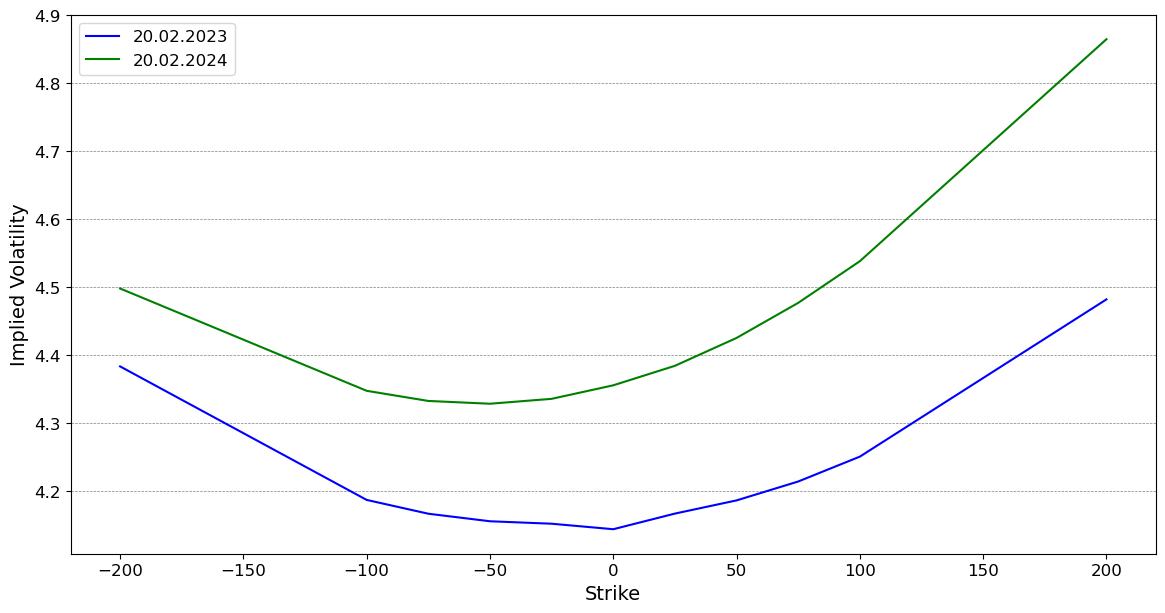

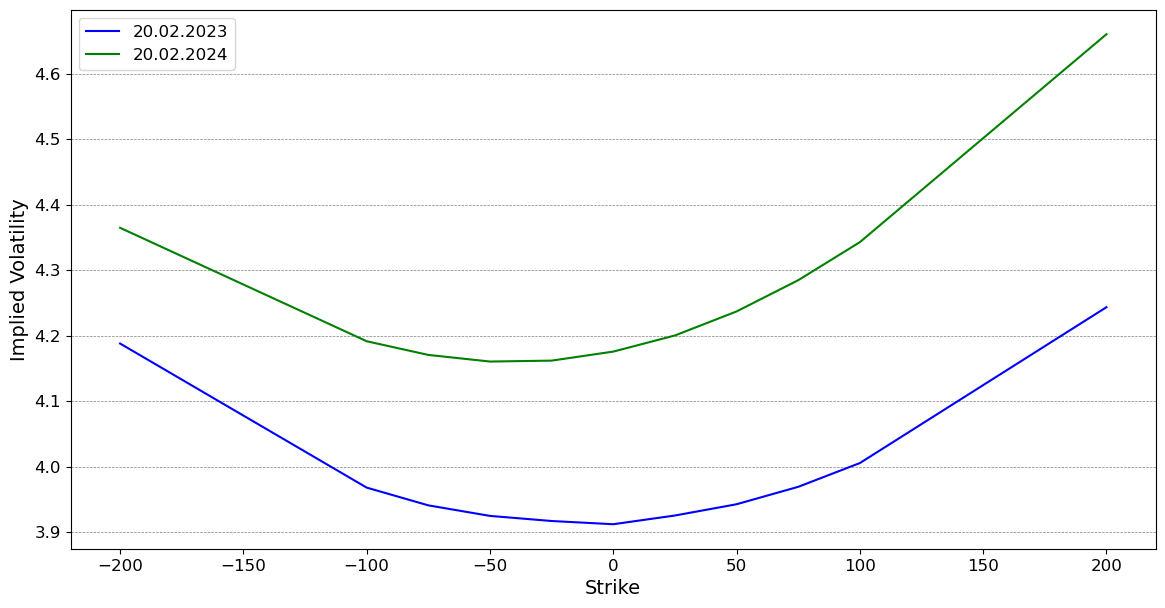

In [30]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# Data from Citi
OTM_2024 = """
-200 -100 -75 -50 -25 0 25 50 75 100 200
10Y1Y 5,1416 5,1819 5,2105 5,2465 5,2898 5,3399 5,3966 5,4596 5,5283 5,6025 5,9448
10Y2Y 5,1588 5,1864 5,2116 5,2442 5,2841 5,3311 5,3845 5,4444 5,5102 5,5815 5,9138
10Y3Y 5,0699 5,0806 5,1017 5,1304 5,1665 5,2101 5,2599 5,3166 5,3795 5,4480 5,7709
10Y5Y 4,9781 4,9597 4,9735 4,9950 5,0241 5,0614 5,1043 5,1549 5,2119 5,2750 5,5792
10Y7Y 4,9234 4,8694 4,8762 4,8916 4,9157 4,9531 4,9896 5,0388 5,0955 5,1594 5,4749
10Y10Y 4,8882 4,7796 4,7750 4,7806 4,7966 4,8315 4,8598 4,9065 4,9626 5,0275 5,3610
10Y12Y 4,7487 4,6379 4,6305 4,6334 4,6470 4,6781 4,7064 4,7517 4,8068 4,8709 5,2033
10Y15Y 4,6292 4,4963 4,4859 4,4862 4,4974 4,5247 4,5530 4,5970 4,6509 4,7143 5,0457
10Y20Y 4,4983 4,3478 4,3329 4,3288 4,3360 4,3559 4,3846 4,4256 4,4772 4,5385 4,8650
10Y30Y 4,3647 4,1915 4,1706 4,1605 4,1619 4,1757 4,2003 4,2370 4,2847 4,3428 4,6603
"""

OTM_2023 = """
-200 -100 -75 -50 -25 ATM 25 50 75 100 200

10Y1Y 4,9351 5,0777 5,1273 5,1820 5,2415 5,3057 5,3743 5,4471 5,5238 5,6043 5,9581
10Y2Y 4,9500 5,0855 5,1340 5,1876 5,2459 5,3088 5,3759 5,4472 5,5225 5,6015 5,9503
10Y3Y 4,9068 5,0022 5,0417 5,0864 5,1361 5,1904 5,2500 5,3138 5,3820 5,4544 5,7812
10Y5Y 4,8816 4,8983 4,9200 4,9473 4,9799 5,0165 5,0608 5,1090 5,1623 5,2205 5,5002
10Y7Y 4,8204 4,7899 4,8056 4,8269 4,8532 4,8817 4,9209 4,9622 5,0087 5,0603 5,3156
10Y10Y 4,8155 4,6829 4,6799 4,6842 4,6948 4,7058 4,7344 4,7639 4,8001 4,8432 5,0831
10Y12Y 4,6756 4,5248 4,5151 4,5172 4,529 4,5295 4,5569 4,5837 4,6178 4,6592 4,8971
10Y15Y 4,5357 4,3667 4,3543 4,3502 4,3531 4,3512 4,3795 4,4036 4,4354 4,4752 4,7111
10Y20Y 4,3837 4,1873 4,1670 4,1559 4,1523 4,1442 4,1672 4,1866 4,2144 4,2510 4,4823
10Y30Y 4,1880 3,9680 3,9409 3,9248 3,9170 3,9121 3,9254 3,9426 3,9692 4,0055 4,2435
"""

# Replace commas with dots and read data into pandas DataFrames
def load_data(data):
    data = data.replace(",", ".")
    return pd.read_csv(StringIO(data), sep=" ")

df_OTM_2024 = load_data(OTM_2024)
df_OTM_2023 = load_data(OTM_2023)

# Function to plot the data
def plot_volatility_surface(df_2023, df_2024, tenor, save_path):
    ten_y_2023 = df_2023.loc[tenor]
    ten_y_2024 = df_2024.loc[tenor]

    OTM_2023 = ten_y_2023.index.str.replace('ATM', '0').astype(int)
    OTM_2024 = ten_y_2024.index.str.replace('ATM', '0').astype(int)

    plt.figure(figsize=(14, 7))
    plt.plot(OTM_2023, ten_y_2023.values, color='blue', label='20.02.2023')
    plt.plot(OTM_2024, ten_y_2024.values, color='green', label='20.02.2024')
    plt.xlabel('Strike', fontsize=14)
    plt.ylabel('Implied Volatility', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.savefig(save_path)  # Save as PNG
    plt.show()
    plt.close()

# Plot data for each tenor
tenors = ["10Y1Y", "10Y2Y", "10Y3Y", "10Y5Y", "10Y7Y", "10Y10Y", "10Y12Y", "10Y15Y", "10Y20Y", "10Y30Y"]
for tenor in tenors:
    plot_volatility_surface(df_OTM_2023, df_OTM_2024, tenor, f"/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/{tenor}.png")
